In [23]:
# import torch as pt
# from torch.autograd.variable import Variable
# import numpy as np
# import pandas as pd
import sys
import time
from IPython.display import display, clear_output, HTML
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# from matplotlib import rc
# import matplotlib
# rc('animation', html='html5')

# %matplotlib inline

In [26]:
print('test100000000000000')
clear_output(wait=True)

time.sleep(2)

print('test100000005')
clear_output(wait=True)

test100000005


# Properties to consider for the F4TCNQ molecule...

* Molecular formula:  $\text{C}_{12}\text{F}_{4} \text{N}_{4}$
* Average mass:  276.149 Da
* Monoisotopic mass:  276.005920 Da
* HOMO (Highest Occupied Molecular Orbit):  8.3 eV
* LUMO (Lowest Unoccupied Molecular Orbit):  5.2 eV

From: https://journals.iucr.org/b/issues/2019/01/00/aw5018/
* $Z = 4,\qquad Z'=0.5$
* Formula Weight: $276.16\,\text{Da} \approx 276.16\,\text{g}/\text{mol}  \approx 4.58574428\times 10^{-25}\, \text{kg}$
* Disperion energy: $-20.2\, \text{kJ}\, \text{mol}^{-1} \leq \varepsilon \leq - 24.8\, \text{kJ}\, \text{mol}^{-1}\quad \approx \quad -0.209353\,\text{eV} \leq \varepsilon \leq -0.257027\,\text{eV}$
* Electrostatic energy: $-12.2\, \text{kJ}\, \text{mol}^{-1} \leq E_{\text{elec}} \leq - 24.2\, \text{kJ}\, \text{mol}^{-1}\quad \approx \quad -0.126441\,\text{eV} \leq E_{\text{elec}} \leq -0.250809\,\text{eV}$
* Repulsive energy: $-10.4\, \text{kJ}\, \text{mol}^{-1} \leq E_{\text{rep}} \leq -14.5\, \text{kJ}\, \text{mol}^{-1}\quad \approx \quad -0.107786\,\text{eV} \leq E_{\text{rep}} \leq -0.150278\,\text{eV}$
* Volume: $1078.34\,\text{Angstroms}^{3}$
* Electron charge density: $0.0351\, e/\text{Angstrom}^{-3} \leq \rho \leq 0.0402\, e/\text{Angstrom}^{-3}$
* Average charge: $Q \approx 0.037433 \, e/\text{Angstrom}^{-3} \cdot 1078.34\,\text{Angstroms}^{3} \approx 40.3659\cdot e \approx 6.46732\times 10^{-18}\, C$

From: https://www.sciencedirect.com/science/article/pii/S2210271X16301074
* Dispersion energy: $~10\, \text{kcal}/\text{mol}$ parallel, and $\sim 3-4\,\text{kcal}/\text{mol}$ t-shaped/head-on
* Parallel: $\varepsilon_{\text{par}} \approx 10\text{kcal}/\text{mol} \approx 41.84\text{kJ}/\text{mol} \approx 0.43364\, \text{eV}$
* T-shaped/Head-on: $\varepsilon_{\text{par}} \approx 4\text{kcal}/\text{mol} \approx 16.736\text{kJ}/\text{mol} \approx 0.173456\, \text{eV}$
* Average: $\varepsilon_{\text{par}} \approx 5.6667\text{kcal}/\text{mol} \approx 23.70934728 \text{kJ}/\text{mol} \approx 0.245731\, \text{eV}$

From: https://www.ccdc.cam.ac.uk/structures/search?pid=ccdc:1818665&sid=IUCr
* Dimensions: $0.867\,\text{nm}\,\times\, 0.475\,\text{nm}$
* Average diameter and radius: $0.671\,\text{nm}$ and $0.3355\,\text{nm}$
* Average estimated $\sigma$: $\sim 0.7\,\text{nm}$

From: https://pubchem.ncbi.nlm.nih.gov/compound/2733307#section=Chemical-and-Physical-Properties
* Topological Polar Surface Area: $95.2\,\text{Angstroms}^{2}$. Thus, $r \approx \sqrt{95.2/\pi} \approx 5.50483\, \text{Angstroms} \approx 0.550483\,\text{nm}$
* Therefore we can approximate: $\sigma \approx 2r \approx 11.0097\, \text{Angstroms} \approx 1.10097\, \text{nm}$

# Important considerations for the model...

* We will consider only neutral molecules (as experiments are conducted at a gate voltage below the molecule's LUMO)
* https://en.wikipedia.org/wiki/Yukawa_potential
* https://en.m.wikipedia.org/wiki/Lennard-Jones_potential

# Reference papers

* https://bayesianbrad.github.io/posts/2019_hmc.html (HMC Overview w/ code)
* https://www.ijcai.org/Proceedings/2018/0419.pdf (Stochastic Fractional HMC)
* https://discovery.ucl.ac.uk/id/eprint/1457514/1/ErikPazosThesis.pdf (Advanced HMC for Diffusion Models)

initial position of particle 1 : tensor([0.4000, 0.5050], requires_grad=True)
initial position of particle 2 : tensor([0.6000, 0.4950], requires_grad=True)
mass/covariance matrix: tensor([[1., 0.],
        [0., 1.]])
initial momenta of particle 1: tensor([0.6000, 0.0000], requires_grad=True)
initial momenta of particle 2: tensor([-0.6000,  0.0000], requires_grad=True)
tensor(0.1800, grad_fn=<MulBackward0>)
tensor(0.0013, grad_fn=<MulBackward0>)


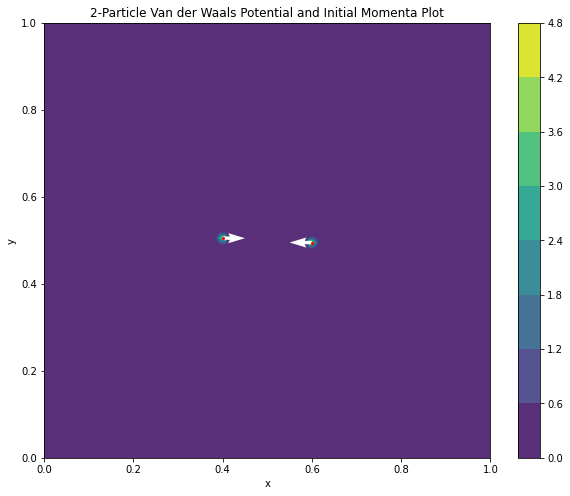

In [194]:
#general parameters for system and meshgrid
dim = [0.0, 50]
n_points = 100


#initial position of particles a and b
# qa0 = pt.from_numpy(np.random.uniform(dim[0], dim[1], size=2)).float()
# qa0.requires_grad = True
# qb0 = pt.from_numpy(np.random.uniform(dim[0], dim[1], size=2)).float()
# qb0.requires_grad = True
qa0 = pt.tensor([0.4, 0.505], requires_grad=True)
qb0 = pt.tensor([0.6, 0.495], requires_grad=True)

print('initial position of particle 1 : {}'.format(qa0))
print('initial position of particle 2 : {}'.format(qb0))


#initial momenta of particles sampled from a multivariate normal distribution ~N(0,M)
M = pt.eye(2)
# pa0 =  pt.from_numpy(np.random.multivariate_normal([0,0], M)).float()
# pa0.requires_grad = True
# pb0 =  pt.from_numpy(np.random.multivariate_normal([0,0], M)).float()
# pb0.requires_grad = True
pa0 = pt.tensor([0.6, 0], requires_grad=True)
pb0 = pt.tensor([-0.6, 0], requires_grad=True)
print('mass/covariance matrix: {}'.format(M))
print('initial momenta of particle 1: {}'.format(pa0))
print('initial momenta of particle 2: {}'.format(pb0))


### DELETE THIS ###
vec1 = pt.tensor([3., 2.], requires_grad=True)
vec2 = pt.tensor([1., 1.], requires_grad=True)
### DELETE THIS ###


#kinetic energy function K
def K(p, M, grad=False):
    KE = 0.5 * p.dot(M.mv(p))
    if grad:
        return pt.autograd.grad([KE], [p])[0]
    else:
        return KE
    
print(K(pa0, M, grad=False))
    
#potential (Van der Waals) energy function U
def U_vdw(qa, qb, grad=False):
    A = 10e-5  #Hamaker coefficient (value depends on the materials properties)
    R = 0.001  #radius of atom (for carbon: 0.07nm / 7e-11m)
    U_max = 4e6
    r = pt.norm(pt.sub(qa, qb))
    if r != 0:
        U = -(A/6) * (((2*R**2) / ((2*R+r)**2 - (2*R)**2)) + \
                      ((2*R**2) / ((2*R+r)**2)) + \
                      (pt.log(((2*R+r)**2 - (2*R)**2)) / ((2*R+r)**2)))
        if grad:
            return pt.autograd.grad([U], [qa])[0]
        else:
            if U >= U_max: U = U_max
            if U <= -U_max: U = -U_max
            return U

print(U_vdw(qa0, qb0, grad=False))

#mesh of potential U evaluated at every point in X and Y
rowscols = np.linspace(dim[0], dim[1], n_points)
X, Y = np.meshgrid(rowscols, rowscols)
U_mesh = X*0
for i in range(len(X[:,0])):
    for j in range(len(Y[0,:])):
        q_loc = pt.from_numpy(np.array([X[i,j],Y[i,j]])).float()
        for q in [qa0, qb0]:
            U_mesh[i,j] += U_vdw(q_loc, q, grad=False)

            
#plot potential, particle, and gradient vector field
fig, ax = plt.subplots(figsize=(10,8))
ax.set(xlim=(dim[0], dim[1]), ylim=(dim[0], dim[1]), 
       title='2-Particle Van der Waals Potential and Initial Momenta Plot', 
       xlabel='x', ylabel='y')
cp = ax.contourf(X, Y, U_mesh, cmap='viridis', alpha=0.9)
fig.colorbar(cp)
ax.plot(qa0[0].detach().numpy(), qa0[1].detach().numpy(), 'o', color='r', markersize=2.0)
ax.plot(qb0[0].detach().numpy(), qb0[1].detach().numpy(), 'o', color='r', markersize=2.0)
ax.quiver(qa0[0].detach().numpy(), qa0[1].detach().numpy(),\
          pa0[0].detach().numpy(), pa0[1].detach().numpy(), scale=12.0, color='w')
ax.quiver(qb0[0].detach().numpy(), qb0[1].detach().numpy(),\
          pb0[0].detach().numpy(), pb0[1].detach().numpy(), scale=12.0, color='w')
plt.show()

random sampled step size: 0.092869
random sampled trajectory size: 14
new momentum and position of particle a : tensor([5.9922e-01, 3.9209e-05]) and tensor([0.4556, 0.5050])
new momentum and position of particle a : tensor([-5.9922e-01, -3.9209e-05]) and tensor([0.5444, 0.4950])
alpha: 0.9926883578300476
beta: 0.8144997156604166
ACCEPT PROPOSAL


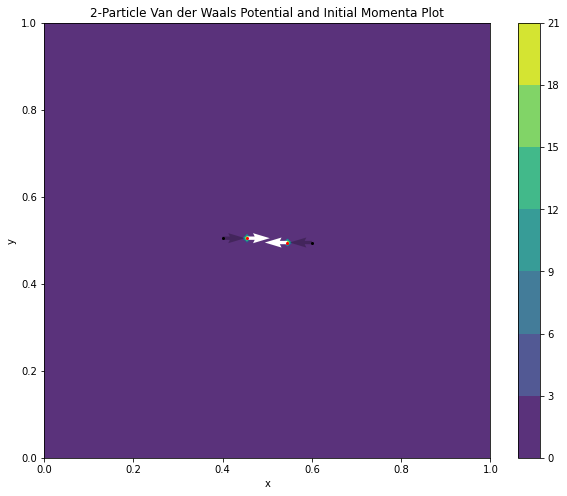

In [195]:
#generate random step and trajectory size from defined distribution
min_step = np.random.uniform(0.01, 0.07)
max_step = np.random.uniform(0.07, 0.18)
min_traj = np.random.uniform(1, 18)
max_traj = np.random.uniform(18, 25)

step_size = np.random.uniform(min_step, max_step)
traj_size = int(np.random.uniform(min_traj, max_traj))
print('random sampled step size: {:.6f}'.format(step_size))
print('random sampled trajectory size: {}'.format(traj_size))


#update momentum by a HALF STEP and position by a FULL STEP
pa1 = pa0 - 0.5 * step_size * U_vdw(qa0, qb0, grad=True)
qa1 = qa0 + step_size * K(pa1, M, grad=True)
print('new momentum and position of particle a : {} and {}'.format(pa1.data, qa1.data))

pb1 = pb0 - 0.5 * step_size * U_vdw(qb0, qa0, grad=True)
qb1 = qb0 + step_size * K(pb1, M, grad=True)
print('new momentum and position of particle a : {} and {}'.format(pb1.data, qb1.data))


#calculate the change in total energy in the Hamiltonian
def deltaH(qi, qf, pi, pf):
    Utot, Ktot = 0., 0.
    with pt.no_grad():
        for i in range(len(pi)):
            Ktot += K(pi[i], M) - K(pf[i], M)
        for j,k in zip(qi[1:], qf[1:]):
            Utot += U_vdw(qi[0], j) - U_vdw(qf[0], k)
    return Ktot + Utot


#evaluate the acceptance 
omega = deltaH([qa0, qb0], [qa1, qb1], [pa0, pb0], [pa1, pb1])
alpha = np.min([1, np.exp(omega)])
beta = np.random.uniform(0,1)
print('alpha: {}'.format(alpha))
print('beta: {}'.format(beta))

if beta <= alpha:
    print('ACCEPT PROPOSAL')
else:
    print('REJECT PROPOSAL')
    
#mesh of potential U evaluated at every point in X and Y
rowscols = np.linspace(dim[0], dim[1], n_points)
X, Y = np.meshgrid(rowscols, rowscols)
U_mesh = X*0
for i in range(len(X[:,0])):
    for j in range(len(Y[0,:])):
        q_loc = pt.from_numpy(np.array([X[i,j],Y[i,j]])).float()
        for q in [qa1, qb1]:
            U_mesh[i,j] += U_vdw(q_loc, q, grad=False)


#plot potential, particle, and gradient vector field
fig, ax = plt.subplots(figsize=(10,8))
ax.set(xlim=(dim[0], dim[1]), ylim=(dim[0], dim[1]), 
       title='2-Particle Van der Waals Potential and Initial Momenta Plot', 
       xlabel='x', ylabel='y')
cp = ax.contourf(X, Y, U_mesh, cmap='viridis', alpha=0.9)
fig.colorbar(cp)

ax.plot(qa0[0].detach().numpy(), qa0[1].detach().numpy(), 'o', color='k', markersize=2.0)
ax.plot(qb0[0].detach().numpy(), qb0[1].detach().numpy(), 'o', color='k', markersize=2.0)
ax.quiver(qa0[0].detach().numpy(), qa0[1].detach().numpy(),\
          pa0[0].detach().numpy(), pa0[1].detach().numpy(), scale=12.0, color='k', alpha=0.25)
ax.quiver(qb0[0].detach().numpy(), qb0[1].detach().numpy(),\
          pb0[0].detach().numpy(), pb0[1].detach().numpy(), scale=12.0, color='k', alpha=0.25)

ax.plot(qa1[0].detach().numpy(), qa1[1].detach().numpy(), 'o', color='r', markersize=2.0)
ax.plot(qb1[0].detach().numpy(), qb1[1].detach().numpy(), 'o', color='r', markersize=2.0)
ax.quiver(qa1[0].detach().numpy(), qa1[1].detach().numpy(),\
          pa1[0].detach().numpy(), pa1[1].detach().numpy(), scale=12.0, color='w')
ax.quiver(qb1[0].detach().numpy(), qb1[1].detach().numpy(),\
          pb1[0].detach().numpy(), pb1[1].detach().numpy(), scale=12.0, color='w')
plt.show()

random sampled step size: 0.104584
random sampled trajectory size: 11
alpha: 0.71741
beta: 0.61505
ACCEPT PROPOSAL


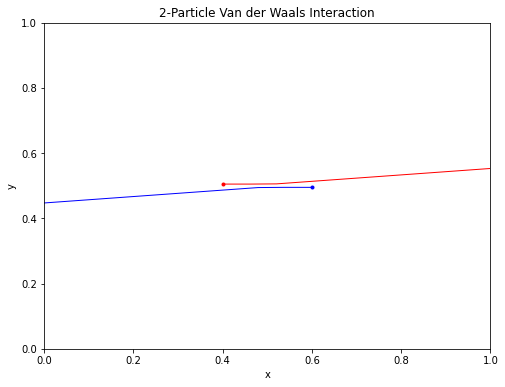

In [313]:
step_size = np.random.uniform(min_step, max_step)
traj_size = int(np.random.uniform(min_traj, max_traj))
print('random sampled step size: {:.6f}'.format(step_size))
print('random sampled trajectory size: {}'.format(traj_size))

#plot
fig, ax = plt.subplots(figsize=(8,6))
ax.set(xlim=(dim[0], dim[1]), ylim=(dim[0], dim[1]), 
       title='2-Particle Van der Waals Interaction', 
       xlabel='x', ylabel='y')
line1, = ax.plot([], [], lw=1, color='r')
line2, = ax.plot([], [], lw=1, color='b')

# evenly_spaced_interval = np.linspace(0, 1, traj_size+2)
# colors = [matplotlib.cm.turbo(x) for x in evenly_spaced_interval]

ax.plot(qa0[0].detach().numpy(), qa0[1].detach().numpy(), 'o', color='r', markersize=3.0)
ax.plot(qb0[0].detach().numpy(), qb0[1].detach().numpy(), 'o', color='b', markersize=3.0)

#update momenta by a HALF STEP
pa = pa0 - 0.5 * step_size * U_vdw(qa0, qb0, grad=True)
pb = pb0 - 0.5 * step_size * U_vdw(qb0, qa0, grad=True)
#update positions by a FULL STEP
qa = qa0 + step_size * K(pa, M, grad=True)
qb = qb0 + step_size * K(pb, M, grad=True)

qax = [qa0[0].detach().item(), qa[0].detach().item()]
qay = [qa0[1].detach().item(), qa[1].detach().item()]

qbx = [qb0[0].detach().item(), qb[0].detach().item()]
qby = [qb0[1].detach().item(), qb[1].detach().item()]

for i in range(traj_size-1):
    #update momenta by FULL STEPS
    pa -= step_size * U_vdw(qa, qb, grad=True)
    pb -= step_size * U_vdw(qb, qa, grad=True)
    #update positions by FULL STEPS
    qa += step_size * K(pa, M, grad=True)    
    qb += step_size * K(pb, M, grad=True)
    #append new position to the end of the list
    qax.append(qa[0].detach().item())
    qay.append(qa[1].detach().item())
    qbx.append(qb[0].detach().item())
    qby.append(qb[1].detach().item())
    
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2,

def animate(i):
    line1.set_data(qax[:i+1], qay[:i+1])
    line2.set_data(qbx[:i+1], qby[:i+1])
    return line1, line2, 

#final update of momentum for a HALF STEP
pa -= 0.5 * step_size * U_vdw(qa, qb, grad=True)
pb -= 0.5 * step_size * U_vdw(qb, qa, grad=True)

#evaluate the acceptance 
omega = deltaH([qa0, qb0], [qa, qb], [pa0, pb0], [pa, pb])
alpha = np.min([1, np.exp(omega)])
beta = np.random.uniform(0,1)
print('alpha: {:.5f}'.format(alpha))
print('beta: {:.5f}'.format(beta))

if beta <= alpha:
    print('ACCEPT PROPOSAL')
else:
    print('REJECT PROPOSAL')

anim = FuncAnimation(fig, animate, frames=traj_size, blit=True, interval=350)
anim